In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [33]:

# https://www.kaggle.com/jeffd23/scikit-learn-ml-from-start-to-finish

def simplify_ages(df):
    df.Age = df.Age.fillna(-0.5)
    bins = (-1, 0, 5, 12, 18, 25, 35, 60, 120)
    group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
    categories = pd.cut(df.Age, bins, labels=group_names)
    df.Age = categories
    return df

def simplify_cabins(df):
    df.Cabin = df.Cabin.fillna('N')
    df.Cabin = df.Cabin.apply(lambda x: x[0])
    return df

def simplify_fares(df):
    df.Fare = df.Fare.fillna(-0.5)
    bins = (-1, 0, 8, 15, 31, 1000)
    group_names = ['Unknown', 'Q1', 'Q2', 'Q3', 'Q4']
    categories = pd.cut(df.Fare, bins, labels=group_names)
    df.Fare = categories
    return df
   
def drop_features(df):
    return df.drop(['Ticket', 'Name', 'Embarked'], axis=1)

def transform_features(df):
    df = simplify_ages(df)
    df = simplify_cabins(df)
    df = simplify_fares(df)
    df = drop_features(df)
    return df

def encode_features(df_train):
    features = ['Fare', 'Cabin', 'Age', 'Sex','Pclass']
    df_combined = df_train[features]
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_combined[feature])
        df_train[feature] = le.transform(df_train[feature])
        
    return df_train
data_train = pd.read_csv('titanic.csv')
data_train = transform_features(data_train)
data_train = encode_features(data_train)

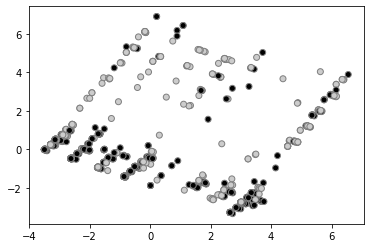

In [41]:
X_all = data_train.drop(['Survived', 'PassengerId'], axis=1)
y = data_train['Survived']
pca = PCA(n_components=2)
pca.fit(X_all)
np.random.seed(10)
X = pca.transform(X_all)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='grey')